## Importing imdb dataset from datasets module of keras 

In [0]:
from keras.datasets import imdb
import numpy as np

### Loading the imdb data and dividing it into training and testing features and labels 

 The argument num_words=10000 means you’ll only keep the top 10,000 most frequently
 occurring words in the training data. Rare words will be discarded. This allows
 you to work with vector data of manageable size

In [0]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)


###train_data and test_data are lists of reviews; each review is a list of word indices(encodinng a sequence of words)

In [74]:
# first review 
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

###Length of the train_data i.e total number of reviews in train data 

In [75]:
len(train_data)

25000

###Length of the test_data i.e total number of reviews in testing data 

In [76]:
len(test_data)

25000

###Shape of train_data and test_data 

In [77]:
print(train_data.shape)
print(test_data.shape)

(25000,)
(25000,)


###train_labels and test_labels are lists of 0s and 1s, where 0 stand for negative nad 1 stands for positive 

In [78]:
# label of first review 
train_labels[0]

1

###Every word has a index saved in a dictionary 
Getting the word index dictionary of imdb dataset 


In [0]:
word_index= imdb.get_word_index()

# here thw key is the word and value is the index ---- {'apple':2256}

###Reversing the word index dictionary so that  we can access the words with the help of indices.

In [0]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

# here the key is the index and value is the word -----{2256:'apple'}

### Decoding  the review.
###Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

In [81]:
# decoding the first review train_data[0]
decoded_review = ' '.join([reverse_word_index.get(i-3 , '?') for i in train_data[0]])


decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

###You can't feed lists of integers into a neural network. You have to turn your lists into tensors. There are two ways to do that:

1 - Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in
your network a layer capable of handling such integer tensors.


2 - One-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector
that would be all 0s except for indices 3 and 5, which would be 1s. Then you
could use as the first layer in your network a Dense layer, capable of handling
floating-point vector data.


Let’s go with the latter solution to vectorize the data, which we’ll do manually for
maximum clarity.



In [0]:
def vectorize_sequences(sequences, dimension=10000):
  
  #creatinng all-zero matrix of shape(len(sequence),dimension)
  results = np.zeros((len(sequences),dimension))  
  
  #set specific indices of results[i] to 1 
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1                    # result[row,column]=1
  return results 
  
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

Vectorized data 

In [84]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

###Vectorizing Labels 

Labels are already in the form of 1's and 0's ,so we just need to change the  type of labels to float32

In [0]:
y_train= np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [86]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [87]:
y_train[0]

1.0

Now the data is ready to feed into a neural network.


##Creating model 


In [0]:
from keras import models 
from keras import layers 

In [0]:
model = models.Sequential()                                          # model is sequential 

model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # Adding First layer with 16 neurons to the model 

model.add(layers.Dense(16, activation='relu'))                       # Adding second layer with 16 neurons 

#model.add(layers.Dense(8, activation='relu'))                       # Adding third layer with 8 neurons 

model.add(layers.Dense(1 , activation='sigmoid'))                    # Adding output layer with one neurons and sigmoid activation function.


###Summary of  the model 

In [90]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


###Choosing a loss function and an optimizer .

Because you’re facing a
binary classification problem and the output of your network is a probability (you end
your network with a single-unit layer with a sigmoid activation), it’s best to use the binary_crossentropy loss.


In [0]:
model.compile(optimizer='rmsprop'
             ,loss='binary_crossentropy'
             ,metrics=['accuracy'])


###Splitting the data into training and validationn data 
In order to monitor during training the accuracy of the model on data it has never
seen before, you’ll create a validation set by setting apart 10,000 samples from the
original training data.

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]



##Training the Model 

In [93]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 162us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/10
15000/15000 [==============================] - 2s 129us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/10
15000/15000 [==============================] - 2s 127us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/10
15000/15000 [==============================] - 2s 127us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/10
15000/15000 [==============================] - 2s 127us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/10
15000/15000 [==============================] - 2s 127us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/10
15000/15000 [==============================] - 2s 131us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

###model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let’s look at it:

In [94]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

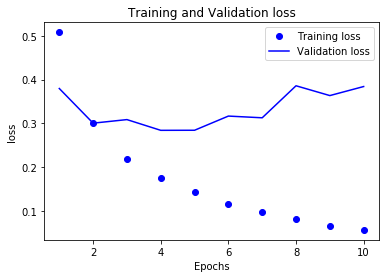

In [95]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')       # 'bo' is for blue dot 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' is for blue line 
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

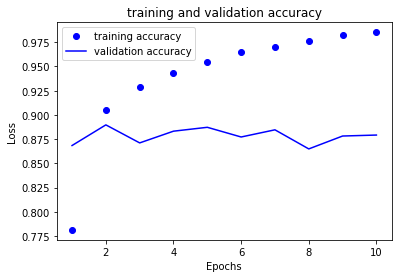

In [100]:
plt.plot(epochs,acc,'bo',label="training accuracy")
plt.plot(epochs,val_acc,'b',label="validation accuracy")
plt.title('training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

###Overfitting 
As you can see, the training loss decreases with every epoch, and the training accuracy
increases with every epoch. That’s what you would expect when running gradientdescent
optimization—the quantity you’re trying to minimize should be less with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. This is an example of overfitting: a
model that performs better on the training data isn’t necessarily a model that will do
better on data it has never seen before. In precise terms, what you’re seeing is overfitting:
after the second epoch, you’re overoptimizing on the training data, and you end
up learning representations that are specific to the training data and don’t generalize
to data outside of the training set.

In  this case, to prevent overfitting, we could simply stop training after four epochs

In [97]:
# Retraining a model from scratch 

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.1800 - acc: 0.9442
Epoch 2/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.1326 - acc: 0.9575
Epoch 3/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.1114 - acc: 0.9638
Epoch 4/4
25000/25000 [==============================] - 2s 83us/step


##Testing the model 

In [98]:
results = model.evaluate(x_test, y_test)

print('test loss =',results[0])
print('test accuracy =',results[1])

test loss = 0.4232883271145821
test accuracy = 0.8634


###Predicting using the trained Model 
Sigmoid function gives decimal value between 0 and 1. 

The values that are closer to 1 are positive reviews and that are closer to 0 are negative reviews 

In [101]:
# Predicting first 10 reviews  
model.predict(x_test[0:10])

array([[0.04401967],
       [0.999977  ],
       [0.9080349 ],
       [0.9813538 ],
       [0.9893477 ],
       [0.98984766],
       [0.9995141 ],
       [0.00133705],
       [0.97469646],
       [0.99992526]], dtype=float32)